
<br>
<h1 style = "font-size:40px; font-weight : bold; color : green; text-align: center; border-radius: 10px 15px;">IMDB Review Sentiment Analysis</h1>
<br>

---

# Overview

The objective of this project is to train a model which will be able to predict the number of positive and negative reviews based on sentiments by using different classification models.


# <a id='18'>Content</a>


1. <a href='#1'>Importing necessary Libraries and Dataset</a>  
2. <a href='#2'>Exploratory Data Analysis</a>  
3. <a href='#3'>Preparing the Data for train test split</a>
    - 3.1. <a href='#7'>Text Normalization</a>
    - 3.2. <a href='#8'>Removing html strips and noise text</a>
    - 3.3. <a href='#9'>Removing special characters</a>
    - 3.4. <a href='#10'>Removing stopwords</a>
    - 3.5. <a href='#11'>Normalized training set reviews</a>
    - 3.6. <a href='#12'>Normalized test set reviews</a>
4. <a href='#4'>Processing the text using models</a>    
    - 4.1 <a href='#13'>Bag of words Model</a>
    - 4.2 <a href='#14'>Term Frequency-Inverse Document Frequency model (TFIDF)</a>
5. <a href='#5'>Modelling the dataset and Performance Metrics</a>
    - 5.1. <a href='#15'>Logistic Regression models</a>
    - 5.2. <a href='#16'>Stochastic gradient descent or Linear support vector machines</a>
    - 5.3. <a href='#17'>Multinomial Naive Bayes Model</a>
6. <a href='#6'>Using WordCloud to see positive and negative words</a>
7. <a href='#19'>Conclusion</a>

### 1. <a id="1">Importing necessary Libraries and Dataset</a> 
[back to top](#18)

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
#from textblob import TextBlob
#from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing the training data
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### 2. <a id="2">Exploratory Data Analysis</a> 
[back to top](#18)

In [3]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

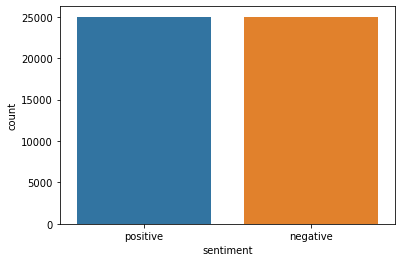

In [5]:
sns.countplot(imdb_data['sentiment'])
plt.show()

Since there is a 50-50 distribution between positive and negative reviews, we can conclude that the dataset is balanced.

### 3. <a id="3">Preparing the Data for train test split</a>
[back to top](#18)

In [6]:
#split the dataset  
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


#### 3.1. <a id='7'>Text normalization</a>

In [7]:
#Tokenization of text
#tokenizer=ToktokTokenizer()
#Setting English stopwords
#stopword_list=nltk.corpus.stopwords.words('english')

#### 3.2. <a id='8'>Removing html strips and noise text</a>

In [8]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

#### 3.3. <a id='9'>Removing special characters</a>

In [9]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

#### 3.4. <a id='10'>Removing stopwords</a>

In [10]:
#set stopwords to english
#stop=set(stopwords.words('english'))
#print(stop)

#removing the stopwords
#def remove_stopwords(text, is_lower_case=False):
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stopword_list]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)    
#     return filtered_text
# #Apply function on review column
# imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

#### 3.5. <a id='11'>Normalized training set reviews</a>

In [11]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[1]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

#### 3.6. <a id='12'>Normalized test set reviews</a>

In [12]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]


'I read all the reviews here AFTER watching this piece of cinematic garbage and it took me at least 2 pages to find out that somebody else didnt think that this appallingly unfunny montage WASNT the acme of humour in the 70s or indeed in any other era If this isnt the least funny set of sketch comedy Ive ever seen itll do till it comes along Half of the skits had already been done and infinitely better by acts such as Monty Python and Woody Allen If I was to say that a nice piece of animation that lasts about 90 seconds is the highlight of this film it would still not get close to summing up just how mindless and drivelridden this waste of 75 minutes is Seminal comedy Only in the world where seminal really DOES mean semen Scatological humour Only in a world where scat IS actually feces Precursor jokes Only if by that we mean that this is a handbook of how NOT to do comedy Tits and bums and the odd beaver Niceif you are a pubescent boy with at least one hand free and havent found out th

### 4. <a id='4'>Processing the text using models</a>
[back to top](#18)

#### 4.1. <a id='13'>Bags of words Model</a>

It is used to convert text documents to numerical vectors or bag of words.

In [13]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6596816)
BOW_cv_test: (10000, 6596816)


In [14]:
cv_train_reviews

<40000x6596816 sparse matrix of type '<class 'numpy.int64'>'
	with 6596816 stored elements in Compressed Sparse Row format>

#### 4.2. <a id='14'>Term Frequency-Inverse Document Frequency model (TFIDF)</a>

It is used to convert text documents to  matrix of  tfidf features.

In [15]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6596816)
Tfidf_test: (10000, 6596816)


#### Labeling and splitting the sentiment text

In [16]:
#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [17]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print('Train set size: ',train_sentiments.shape)
print('Test set size: ',test_sentiments.shape)

Train set size:  (40000, 1)
Test set size:  (10000, 1)


### 5. <a id="5">Modelling the dataset and Performance Metrics</a>
[back to top](#18)

#### 5.1. <a id='15'>Logistic Regression models</a>

In [18]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


##### Predicting using the LR model

In [19]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 1]


##### Performance of the model

In [20]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7618
lr_tfidf_score : 0.7631


In [21]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.76      0.76      4993
    Negative       0.76      0.76      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

              precision    recall  f1-score   support

    Positive       0.75      0.78      0.77      4993
    Negative       0.77      0.74      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [22]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print('confusion matrix for bag of words: \n',cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print('confusion matrix for tfidf features: \n',cm_tfidf)

confusion matrix for bag of words: 
 [[3822 1185]
 [1197 3796]]
confusion matrix for tfidf features: 
 [[3723 1284]
 [1085 3908]]


#### 5.2. <a id='16'>Stochastic gradient descent or Linear support vector machines</a>

In [23]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


##### Predicting using the SVM model

In [24]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 0 1 ... 0 1 1]
[1 1 1 ... 1 1 1]


##### Performance of the model

In [25]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.627
svm_tfidf_score : 0.5111


In [26]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.93      0.27      0.42      4993
    Negative       0.57      0.98      0.72      5007

    accuracy                           0.63     10000
   macro avg       0.75      0.63      0.57     10000
weighted avg       0.75      0.63      0.57     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [27]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print('confusion matrix for bag of words: \n',cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print('confusion matrix for tfidf features: \n',cm_tfidf)

confusion matrix for bag of words: 
 [[4900  107]
 [3623 1370]]
confusion matrix for tfidf features: 
 [[5007    0]
 [4889  104]]


#### 5.3. <a id='17'>Multinomial Naive Bayes Model</a>

In [28]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


##### Predicting using the Multinomial Naive Bayes Model

In [29]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 1]


##### Perforamce of the model

In [30]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7625
mnb_tfidf_score : 0.7624


In [31]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.77      0.76      4993
    Negative       0.77      0.76      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

              precision    recall  f1-score   support

    Positive       0.76      0.77      0.76      4993
    Negative       0.77      0.75      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [32]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print('confusion matrix for bag of words: \n',cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print('confusion matrix for tfidf features: \n',cm_tfidf)

confusion matrix for bag of words: 
 [[3789 1218]
 [1157 3836]]
confusion matrix for tfidf features: 
 [[3779 1228]
 [1148 3845]]


### 6. <a id='6'>Using WordCloud to see positive and negative words</a>
[back to top](#18)

#### Word cloud for positive review words

<function matplotlib.pyplot.show(close=None, block=None)>

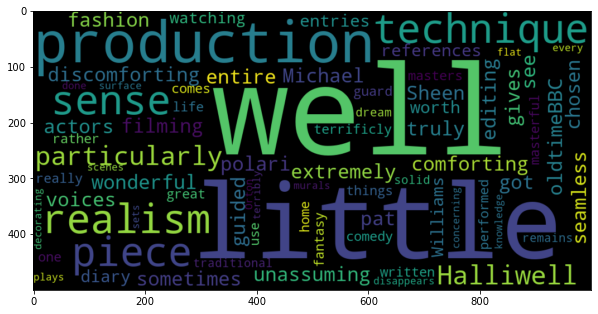

In [33]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

#### Word cloud for negative review words

<function matplotlib.pyplot.show(close=None, block=None)>

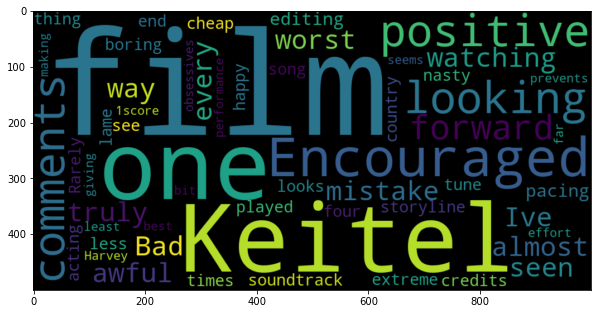

In [34]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

### 7. <a id='19'>Conclusion</a>
[back to top](#18)
* We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector  machines.